In [6]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [7]:
import os
print(os.listdir("/content"))


['.config', 'archive (1).zip', 'sample_data']


CSV FOUND: /content/Mall_Customers.csv


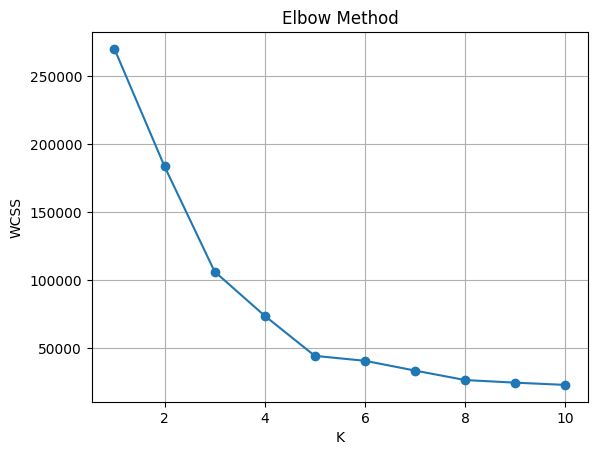

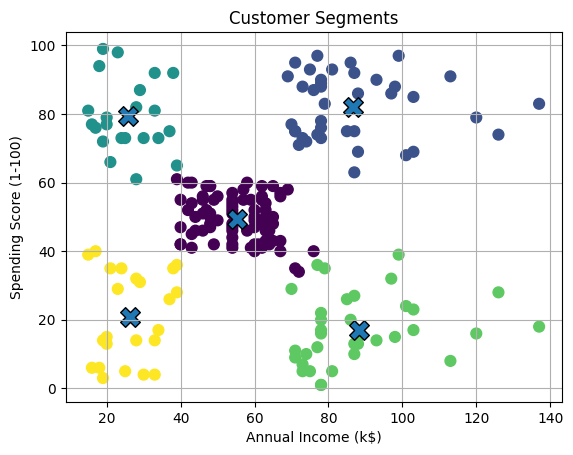

In [8]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -------------------------
# Step 1: Use your actual ZIP name from os.listdir
# -------------------------
zip_path = "/content/archive (1).zip"   # <-- change if needed

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("/content/")

# -------------------------
# Step 2: Find CSV inside extracted folder
# -------------------------
csv_file = None
for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        csv_file = "/content/" + file
        break

print("CSV FOUND:", csv_file)

df = pd.read_csv(csv_file)

# -------------------------
# K-Means
# -------------------------
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Apply K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], s=60)

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='X', s=200, edgecolor='black')

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()
